In [1]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import io, color

import time
import os
import datetime
import pickle
# import scipy

In [9]:
run -i cta_absorption.py

In [3]:
run -i cta_chog.py

In [4]:
run -i cta_fspecial.py

In [5]:
run -i cta_products.py

In [6]:
### make results folder
dt_now = datetime.datetime.now().strftime('%Y%m%d')

results_path = './results_' + dt_now + '/'
print(results_path)

if not os.path.isdir(results_path):
    os.mkdir(results_path)

./results_20201211/


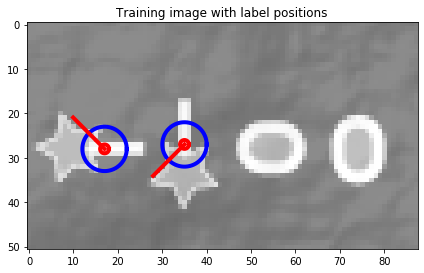

In [10]:
## Loading & initializing traing images

which_label=0   # 0 or 1. label position の 1 つ目か 2 つ目かを指定
# matlab は index が 1 始まり、python は 0 始まりなので注意

absorption=0     # Simulates absorption leading to a decreasing 
                 # signal/noise ratio in X direction 
noise=0.00       # Noise level

path = './demo5/'
train_img_fname= path + 'train_orient1.png' 

#label_positions=np.array([((29,18),(28,36)),((29,56),(29,75))]);   # object positions
label_positions=np.array([((28,17),(27,35)),((28,55),(28,74))]); # python の index が 0 始まりのため、1ずつ座標を小さくする
## [(星のラベル（1つ目, 2つ目）) ,　（楕円のラベル（1つ目, 2つ目））]
    
label_orientations=np.array(([(-1-1j)/np.sqrt(2),(-1+1j)/np.sqrt(2)],[-1,1j]));    # object orientations encoded in 
                                                                            # terms of complex numbers

label_symmetry_order=(1,2)

          
train_imgs=[]       # List of training images
train_labels=[]     # List of label images 
train_orientation_labels=[]     # List of label images 




plt.figure(1)
img = 1-np.float64(color.rgb2gray(color.rgba2rgb(io.imread(train_img_fname))))

## 位置ラベル
label=np.zeros(img.shape) 
indx = ((label_positions[which_label][:,0],label_positions[which_label][:,1]))
label[indx]=1

## 方向ラベル
olabel=np.zeros(img.shape, dtype = complex) 
olabel[indx]=label_orientations[which_label]

train_imgs.append(Cta_absorption(img,absorption,noise).cta_absorption())
train_labels.append(label) 
train_orientation_labels.append(olabel) 

## create plots
io.imshow(train_imgs[0] ** 0.5, cmap = 'gray') 

# 極座標を作る。
theta = np.linspace(0, 2*np.pi, 200)
X = 1*np.cos(theta)
Y = 1*np.sin(theta)

X2 = 5*np.cos(theta)
Y2 = 5*np.sin(theta)

## グラフの表示の時はx軸とy軸が逆になるので、(y,x) の順番で入れている
gt_y = label_positions[which_label][:,0]
gt_x = label_positions[which_label][:,1]

for d in range(gt_x.shape[0]):
    ## 円
    plt.plot(list(X2[:])+label_positions[which_label][d][1],list(Y2[:])+label_positions[which_label][d][0], 'b',linewidth = 4)#,'g','LineWidth',2) 
    
    ## 点
    plt.plot(list(X[:])+label_positions[which_label][d][1],list(Y[:])+label_positions[which_label][d][0], 'r',linewidth = 4)
    
    ## 方向を示す棒
    plt.plot([label_positions[which_label][d][1],label_positions[which_label][d][1]+label_orientations[which_label][d].real*10],
             [label_positions[which_label][d][0],label_positions[which_label][d][0]+label_orientations[which_label][d].imag*10],'r',linewidth = 4)
plt.title('Training image with label positions') 
plt.show()

In [21]:
# print(label_positions[which_label])

# print(label_positions[which_label][0][1])

# print(list(X2[:]))

In [11]:
## Parameter setup 
                
# Maximum angular frequency for the Fourier HOG features and the filter
## ※indexing の違いによってはfrequencyがoriginalと変わっちゃうかもしれないので気を付ける
L=5 

# Size of the voting function of the Harmonic Filter 
# (complex Gaussian derivatives)
## ハーモニックフィルターの voting function の大きさ ← ハーモニックフィルタよく分からない
v_sigma=[2.0] # 元スクリプトでは int だが、リストにする 

# Non-linear features fpr the filter.
# Here: multiplication of three Fourier coefficients while the third one 
# is the complex conjugate coefficient
## 3つの特徴量の積の組み合わせ。ここでは3つ目が複素共役
product_options={'monoms':['001']} # リストではなく辞書として指定した           

# We choose Fourier HOG features with 4 radial bins ← 4つではなく3つでは？ 分からないので呼び出しているスクリプト見てみる
# They should cope with the differnt kinds of shapes 
# in the training images
## 4種類の円周方向の bin を使う。形の異なる物体を識別するため。
w_func=['circle',[0,2],[2,2],[4,2]] 


# Size of the voting function of the Harmonic Filter (orientation field)
# (complex Gaussian derivatives)
v_sigma2=[2.0] # リストにする 

# We choose Fourier HOG features with 1 Gaussian shaped bin (orientation field)
## window関数にgaussianの形を選ぶ
w_func2=['gauss',2] 

# Additional options for the Fourier HOG features
##　※ 辞書機能で指定してみる。渡す時は **chog_options と ** アスタリスク2個を付けて渡す
## 参考 https://note.nkmk.me/python-argument-expand/
chog_options={'w_func':w_func, 
              'presmooth':2.0, # initial smoothing (before computing the image gradient)
              'l2':True, # in order to cope with the absorption we choose l2 normalization
              'gamma':0.8, # makes the gradient orientation more dominant over magnitude
              'verbosity':0} #  plot the window functions 1=yes/0=no

              
print('  we train a filter for the orientation detection task\n')                 
print('training takes a while, because we must build the whole system of equations & solve it\n')                 



  we train a filter for the orientation detection task

training takes a while, because we must build the whole system of equations & solve it



In [12]:
run -i cta_train2.py

cta_train, w_func: ['gauss', 2]
computing features for image 1
cta_chog, w_func: ['circle', [0, 2], [2, 2], [4, 2]]
cta_chog --done
self.feature_order[1]
5
cta_products was called
solving regression problem ... 
done
self.verbosity: 1
self.output_order: 1
nargout: 2


<Figure size 432x288 with 0 Axes>

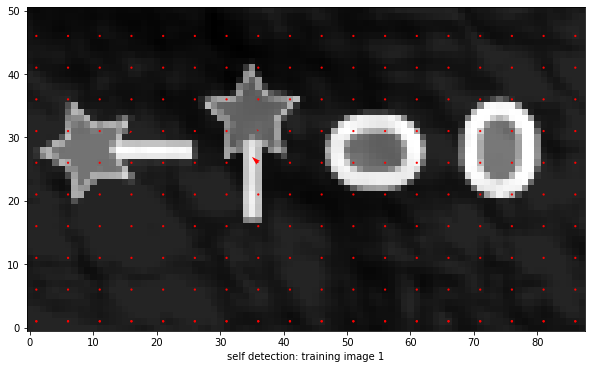

CPU times: user 3.73 s, sys: 71 ms, total: 3.8 s
Wall time: 483 ms


In [13]:
%%time
# セルの処理時間の計測
[model_orient,fimage]=Cta_train2(train_imgs,      # List of training images
                                 train_orientation_labels, # List of training label direction images
                                 precision='complex128',    # We choose double precision numbers
                                 w_func=w_func2,
                                 v_sigma=v_sigma2, 
                                 product_options=product_options, 
                                 L=L,
                                 chog_options=chog_options, 
                                 verbosity=1, 
                                 output_order=label_symmetry_order[which_label]).cta_train2() 
                                    # a gradient is of order 1 
                                    




In [14]:
run -i cta_apply2.py

processing test image 1
cta_chog, w_func: ['circle', [0, 2], [2, 2], [4, 2]]


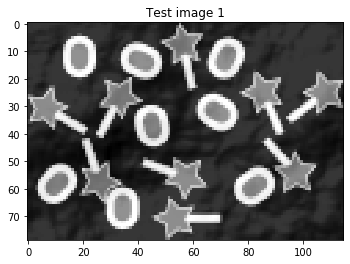

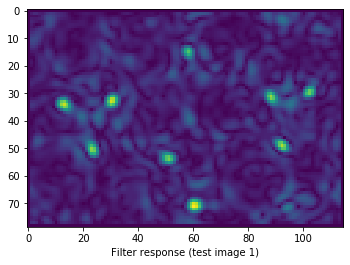

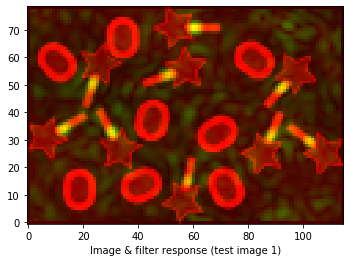

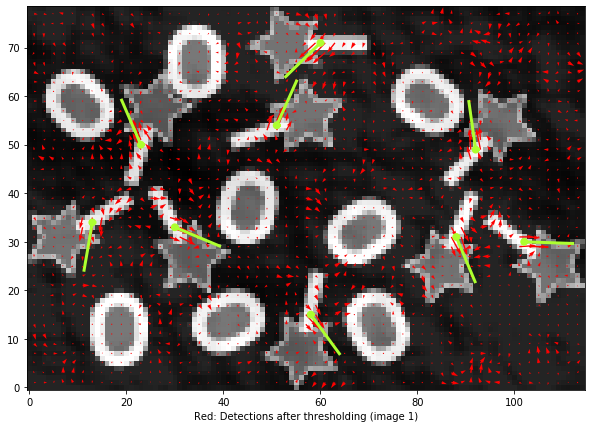

In [17]:
##  Loading & initializing the test images

test_img_fnames=[path + 'test_orient1.png'] 

test_images=[] 

for l in range(len(test_img_fnames)):
    img = 1-np.float64(color.rgb2gray(color.rgba2rgb(io.imread(test_img_fnames[0]))))
    img=Cta_absorption(img,absorption,noise).cta_absorption()

#     img = np.loadtxt('test_img1.csv', delimiter=',')
### 20201015 デバッグ用にオクターブの出力を読み込む
   
    test_images.append(img)
    
    plt.figure() 
#     subplot(1,numel(test_img_fnames),l) ###【次ここから】 fig, ax を指定してサブプロットにする?
    plt.imshow(np.real(img**0.5), cmap='gray')
    plt.title('Test image ' + str(l+1)) 


## Applying the filters to the test image
import cv2
from scipy.ndimage.morphology import binary_dilation
from scipy.ndimage.filters import maximum_filter

Horientation = []
H = []
for l in range(len(test_img_fnames)): #l=1:numel(test_img_fnames)
    n_image = l+1
    print('processing test image %d' % n_image) 
    
    # orientations
    Horientation.append(Cta_apply2(test_images[l],model_orient,padding=0, precision='complex64').cta_apply2())
    # detections
    H.append(np.abs(Horientation[l])) 


## Local maxima detection
Hdet = []
kernel_dilate = np.array([1,1,1,1,0,1,1,1,1]).reshape(3,3)

test_gt_x = [] #[l][d] で成分指定
test_gt_y = []

for l in range(len(test_img_fnames)): #=1:numel(test_img_fnames)
    
    test = maximum_filter(H[l], footprint=np.array([1,1,1,1,0,1,1,1,1]).reshape(3,3), mode='constant')    
    Hdet.append(H[l]*(H[l]>test)>0.55)
#     plt.imshow(Hdet[l])
#     plt.show()

    test_gt_y.append(np.where(Hdet[l]==1)[0])
    test_gt_x.append(np.where(Hdet[l]==1)[1])

## Plotting results (dtections + orientations)
for l in range(len(test_img_fnames)):   
    plt.figure()
    plt.imshow(H[l]) 
    plt.xlabel('Filter response (test image ' + str(l+1) + ')') 
    plt.show()
   
    plt.figure() 
    RGB=np.zeros([test_images[l].shape[0],test_images[l].shape[1],3]) 
    RGB[:,:,0]=test_images[l]
    H2=H[l]/np.max(H[l])
    RGB[:,:,1]=H2*(H2>0) 
    plt.imshow(RGB, origin='lower')
    plt.xlabel('Image & filter response (test image ' + str(l+1) + ')')
    plt.show()
    
    plt.figure(figsize=(10,15))
    plt.imshow(np.real(test_images[l]), cmap='gray', origin='lower')

    # 極座標を作る
    theta = np.linspace(0, 2*np.pi, 200)
    x = np.cos(theta)*0.5
    y = np.sin(theta)*0.5

    for d in range(len(test_gt_x[l])):#=1:numel(test_gt(l).det_x)
        plt.plot(x[:]+test_gt_x[l][d], y[:]+test_gt_y[l][d], linewidth=3, color='greenyellow') #,'r','LineWidth',2) 

    orient_img=Horientation[l]
    orient_img2=orient_img/(np.abs(orient_img)+eps)
    direction_x=np.real(orient_img2) 
    direction_y=np.imag(orient_img2) 
    for d in range(len(test_gt_x[l])):
        py=test_gt_x[l][d]
        px=test_gt_y[l][d]
        plt.plot([py,py+direction_x[px,py]*10],[px,px+direction_y[px,py]*10], linewidth=3, color='greenyellow') 

    [X,Y]=np.meshgrid(np.arange(1,orient_img.shape[1],2), np.arange(1,orient_img.shape[0],2))
    plt.quiver(X,Y,np.real(orient_img[1::2,1::2]), np.imag(orient_img[1::2,1::2]), color='red', scale = 20)
    plt.xlabel('Red: Detections after thresholding (image ' + str(l+1) + ')') 
    plt.show()


In [16]:
# 再利用の条件は以下の引用を載せることなので、このセルは消したらダメ


# Copyright (c) 2011, Henrik Skibbe and Marco Reisert
# All rights reserved.
# 
# Redistribution and use in source and binary forms, with or without
# modification, are permitted provided that the following conditions are met: 
# 
# 1. Redistributions of source code must retain the above copyright notice, this
#    list of conditions and the following disclaimer. 
# 2. Redistributions in binary form must reproduce the above copyright notice,
#    this list of conditions and the following disclaimer in the documentation
#    and/or other materials provided with the distribution. 
# 
# THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS AND CONTRIBUTORS "AS IS" AND
# ANY EXPRESS OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE IMPLIED
# WARRANTIES OF MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE ARE
# DISCLAIMED. IN NO EVENT SHALL THE COPYRIGHT OWNER OR CONTRIBUTORS BE LIABLE FOR
# ANY DIRECT, INDIRECT, INCIDENTAL, SPECIAL, EXEMPLARY, OR CONSEQUENTIAL DAMAGES
# (INCLUDING, BUT NOT LIMITED TO, PROCUREMENT OF SUBSTITUTE GOODS OR SERVICES 
# LOSS OF USE, DATA, OR PROFITS  OR BUSINESS INTERRUPTION) HOWEVER CAUSED AND
# ON ANY THEORY OF LIABILITY, WHETHER IN CONTRACT, STRICT LIABILITY, OR TORT
# (INCLUDING NEGLIGENCE OR OTHERWISE) ARISING IN ANY WAY OUT OF THE USE OF THIS
# SOFTWARE, EVEN IF ADVISED OF THE POSSIBILITY OF SUCH DAMAGE.
# 
# 
# The views and conclusions contained in the software and documentation are those
# of the authors and should not be interpreted as representing official policies, 
# either expressed or implied, of the FreeBSD Project.

# # The following code for densely computing local Fourier HOG features
# # is based on our paper: 
# #
# # Henrik Skibbe and Marco Reisert 
# # "Circular Fourier-HOG Features for Rotation Invariant Object Detection in Biomedical Images"
# # in Proceedings of the IEEE International Symposium on Biomedical Imaging 2012 (ISBI 2012), Barcelona 
# #
# # You can find a free copy here :
# # http://skl220b.ukl.uni-freiburg.de/mr/authoring/mitarbeiter/aktuelle/skibbe/CHOGFilterPaper_en.pdf
# #
# # If you use our functions or partially make use of our code then please cite this paper.
